<a href="https://colab.research.google.com/github/RohithMH000/ML/blob/main/Regularized_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
alphas = np.logspace(-3, 2, 20)

ridge_train_scores, ridge_test_scores = [], []
lasso_train_scores, lasso_test_scores = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_train_scores.append(ridge.score(X_train, y_train))
    ridge_test_scores.append(ridge.score(X_test, y_test))

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_train_scores.append(lasso.score(X_train, y_train))
    lasso_test_scores.append(lasso.score(X_test, y_test))

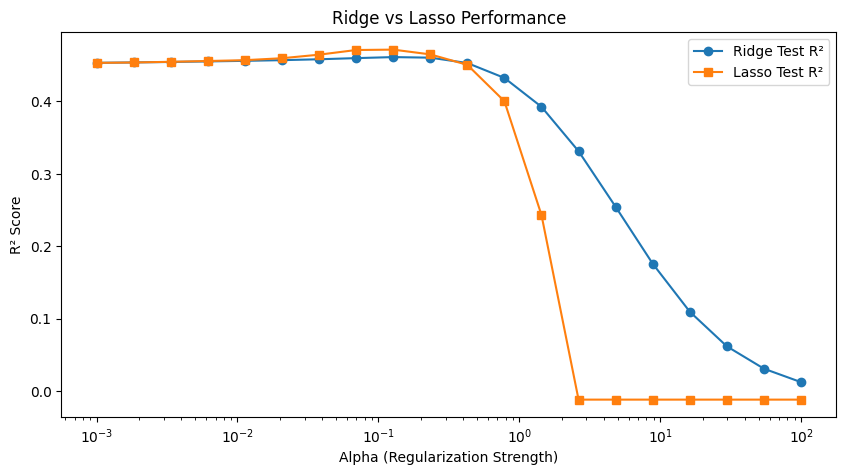

In [5]:
plt.figure(figsize=(10,5))
plt.plot(alphas, ridge_test_scores, 'o-', label='Ridge Test R²')
plt.plot(alphas, lasso_test_scores, 's-', label='Lasso Test R²')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge vs Lasso Performance')
plt.legend()
plt.show()